In [7]:
import os
import numpy as np
from scipy import misc
import argparse
import json
import cv2

from tensorpack import *
from train import Model
from reader import Data
from cfgs.config import cfg
import shutil
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
test_file_path = "plate_test.txt"
# img_path = "plate_keypoint"
model_path = 'train_log/train0725-153839/model-4824'
new_plate_path = 'new_plate'
new_plate_h = 50
new_plate_w = 160
pad = 10

In [9]:
# initialize the model
depth = 18
model = Model(depth)
sess_init = SaverRestore(model_path)
predict_config = PredictConfig(session_init=sess_init,
                               model=model,
                               input_names=["input"],
                               output_names=["logits"])

In [10]:
predict_func = OfflinePredictor(predict_config)

[0725 16:26:43 @regularize.py:18] Apply regularizer for conv0/W:0
[0725 16:26:43 @regularize.py:18] Apply regularizer for group0/block0/conv1/W:0
[0725 16:26:43 @regularize.py:18] Apply regularizer for group0/block0/conv2/W:0
[0725 16:26:43 @regularize.py:18] Apply regularizer for group0/block1/conv1/W:0
[0725 16:26:43 @regularize.py:18] Apply regularizer for group0/block1/conv2/W:0
[0725 16:26:43 @regularize.py:18] Apply regularizer for group1/block0/conv1/W:0
[0725 16:26:43 @regularize.py:18] Apply regularizer for group1/block0/conv2/W:0
[0725 16:26:43 @regularize.py:18] Apply regularizer for group1/block0/convshortcut/W:0
[0725 16:26:43 @regularize.py:18] Apply regularizer for group1/block1/conv1/W:0
[0725 16:26:43 @regularize.py:18] Apply regularizer for group1/block1/conv2/W:0
[0725 16:26:43 @regularize.py:18] Apply regularizer for group2/block0/conv1/W:0
[0725 16:26:43 @regularize.py:18] Apply regularizer for group2/block0/conv2/W:0
[0725 16:26:43 @regularize.py:18] Apply regular

In [11]:
def cal_coornidate_function(predictions,ori_img_h,ori_img_w):
#     print(predictions)
    coornidate = []
    temw = (predictions[0]+0.5)*ori_img_w-10
    temh = (predictions[1]+0.5)*ori_img_h-10
    coornidate.append([temw,temh])
#     print(coornidate)
    temw = (predictions[2]+0.5)*ori_img_w+10
    temh = (predictions[3]+0.5)*ori_img_h-10
    coornidate.append([temw,temh])
   
    temw = (predictions[4]+0.5)*ori_img_w+10
    temh = (predictions[5]+0.5)*ori_img_h+10
    coornidate.append([temw,temh])

    temw = (predictions[6]+0.5)*ori_img_w-10
    temh = (predictions[7]+0.5)*ori_img_h+10
    coornidate.append([temw,temh])
    return coornidate

In [12]:
lines =[]
with open(test_file_path,"r") as f:
    lines = f.readlines()
    f.close()
print("total items :" + str(len(lines)))
if os.path.isdir(new_plate_path) == True:
    shutil.rmtree(new_plate_path)
os.mkdir(new_plate_path)
for line in lines:
    line = line.split(" ")
    img_path = line[0]
    img = cv2.imread(img_path)
    img_ori = img
#    plt.imshow(img)
    ori_img_h,ori_img_w = img.shape[0:2]
#   
#     print(img.shape)
    img = cv2.resize(img, (cfg.img_h, cfg.img_w))
    input_img = np.expand_dims(img, axis=0)
    predictions = predict_func([input_img])[0][0]
    coor = cal_coornidate_function(predictions,ori_img_h,ori_img_w)
    pts1 = np.float32(coor)
    pts2 = np.float32([[0,0],[new_plate_w,0],[new_plate_w,new_plate_h],[0,new_plate_h]])

    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img_ori,M,(new_plate_w,new_plate_h))
#     plt.imshow(dst)
#     print(img_path)
    img_name = img_path.split("/")[-1]
#     print(img_name)
    cv2.imwrite(os.path.join(new_plate_path,img_name),dst[0:new_plate_h,0:new_plate_w])
   
print("process has finishined!!!")

total items :86
process has finishined!!!


In [100]:
# print(len(predictions))


[[49.99574089050293, 27.399914860725403], [114.61246705055237, 18.877043724060059], [119.66083073616028, 40.511054992675781], [33.442700922489166, 41.134790182113647]]


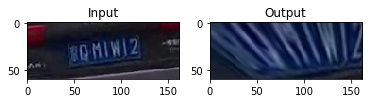

In [143]:

# plt.savefig('t.jpg')
# plt.show()

In [86]:
# from reader import Data
# ds = Data("train")
# ds.reset_state()
# producer = ds.get_data()
# dp = next(producer)

In [87]:
# input_img = np.expand_dims(dp[0], axis=0)

In [88]:
# predictions = predict_func([input_img])[0][0]

In [89]:
# predictions

In [90]:
# plt.imshow(img)

In [91]:
# plt.imshow(dp[0])

In [92]:
# dp[1]